# **Parcial N.2 Algoritmos y complejidad**

#### **NRC: 2360**

**Wilson Estrada**   Cod: 200098310

**Sandro Torres**    Cod: 200182462

**Gabriel Palencia** Cod: 200180307

**Bernardo Alvarez** Cod: 200173591

## **Punto N.1  Suma de enteros grandes**


### **Algoritmo**

In [ ]:
from typing import List
import time
import random
import matplotlib.pyplot as plt

class MultiplicationOperation:
    @staticmethod
    def add(x: str, y: str, z: str = None) -> str:
        """_summary_

        Args:
            x (str): First number to add in string format
            y (str): Second number to add in string format
            z (str, optional): Third number to add in string format. Defaults to None.

        Returns:
            str: Sum of the numbers in string format
        """
        if z is None:
            return str(int(x) + int(y))
        else:
            return str(int(x) + int(y) + int(z))

    @staticmethod
    def left_shift(a: str, n: int) -> int:
        """

        Args:
            a (str): _description_
            n (int): _description_

        Returns:
            int: _description_
        """
        return int(a) * (10 ** n)

    @staticmethod
    def multiplyDV(x: str, y: str) -> str:
        """Multiply two numbers using the divide and conquer approach

        Args:
            x (str): Number 1 in string format
            y (str): Number 2 in string format

        Returns:
            str: Result of the multiplication in string format
        """
        if len(x) == 1 or len(y) == 1:
            return str(int(x) * int(y))
        else:
            n = max(len(x), len(y))
            half = n // 2
            xi = str(int(x) // 10 ** half)
            xd = str(int(x) % 10 ** half)
            yi = str(int(y) // 10 ** half)
            yd = str(int(y) % 10 ** half)
            s1 = MultiplicationOperation.add(xi, xd)
            s2 = MultiplicationOperation.add(yi, yd)
            p = MultiplicationOperation.multiplyDV(xi, yi)
            q = MultiplicationOperation.multiplyDV(xd, yd)
            r = MultiplicationOperation.multiplyDV(s1, s2)
            aux = int(r) - int(p) - int(q)
            p = MultiplicationOperation.left_shift(p, 2 * half)
            aux = MultiplicationOperation.left_shift(aux, half)
            z = MultiplicationOperation.add(p, aux, str(q))
            return z

def generate_random_number_str(n: int) -> str:
    """Generate a random number of n digits

    Args:
        n (int): Number of digits

    Returns:
        str: Random number in string format
    """
    digits = '123456789'
    random_numbers = random.choices(digits, k=n)
    random_number_str = ''.join(random_numbers)
    return random_number_str

def test_speed(n_values: List[int]) -> List[float]:
    """Test de speed of the multiplyDV function

    Args:
        n_values (List[int]): List of sizes of the numbers to test

    Returns:
        List[float]: List of execution times for each size of number
    """
    y_values = []
    for n in n_values:
        total_time = 0
        num1 = generate_random_number_str(n)
        num2 = generate_random_number_str(n)
        for _ in range(20):
            start_time = time.time()
            MultiplicationOperation.multiplyDV(num1, num2)
            end_time = time.time()
            duration = end_time - start_time
            total_time += duration
        average_time = total_time / 20
        y_values.append(average_time)
    return y_values

def plot_results(n_values: List[int], y_values: List[float]) -> None:
    """Plot the results of the test_speed function

    Args:
        n_values (List[int]): List of sizes of the numbers
        y_values (List[float]): List of execution times for each size of number
    """
    print(n_values)
    print(y_values)
    plt.figure(figsize=(7, 5))
    plt.plot(n_values, y_values, linestyle='-', color='b', markersize=2, label='Data')
    plt.scatter(n_values, y_values, color='red', s=20)
    plt.title('Multiplication of large Integers')
    plt.xlabel('Size of Numbers')
    plt.ylabel('Execution Time (Seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

### **Complejidad practica**

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[0.008973252773284913, 0.023554474115371704, 0.048250889778137206, 0.06990194320678711, 0.12560394406318665, 0.14431015849113465, 0.19916133880615233, 0.21886504888534547, 0.2717786610126495, 0.34810816645622256]


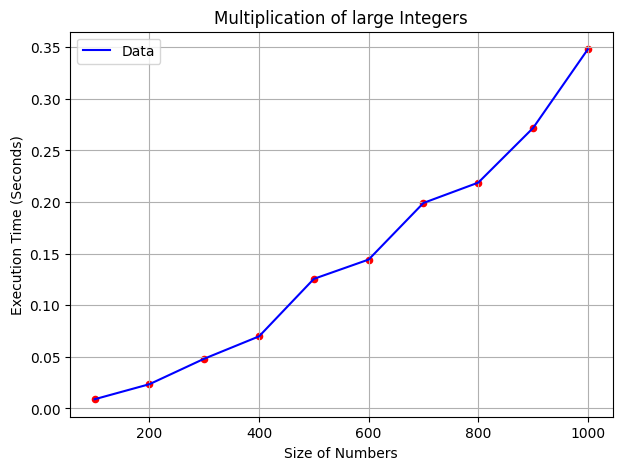

In [ ]:
if __name__ == "__main__":
    n_values = [100 * i for i in range(1, 11)]
    y_values = test_speed(n_values)
    plot_results(n_values, y_values)

### **Complejidad practica**

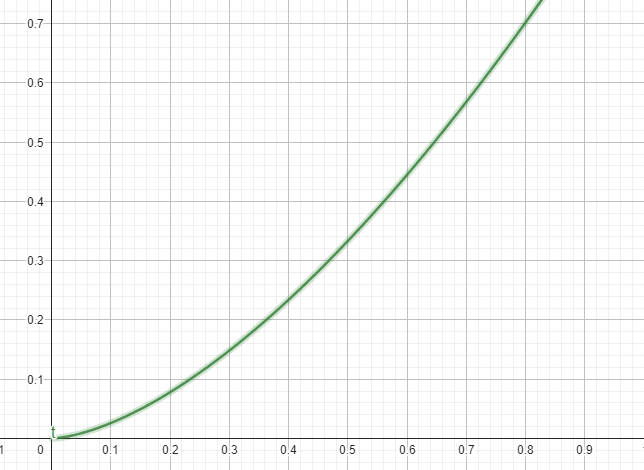

## **Punto N.2  Estructuras Espaciales**


### **Algoritmo**

### **Complejidad practica**

## **Punto N.3  Cuadrados**


### **Algoritmo**

Problem #1
Squares of size 1: 2
Squares of size 2: 1


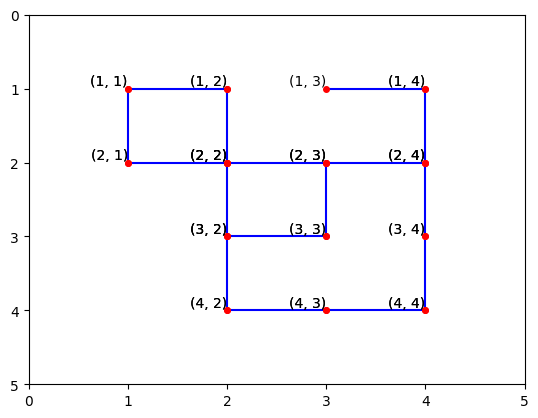

*******************************************************
Problem #2
No square was found


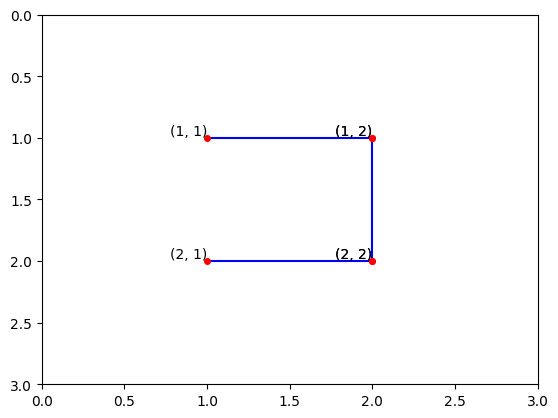

*******************************************************
Problem #3
Squares of size 1: 3
Squares of size 2: 2


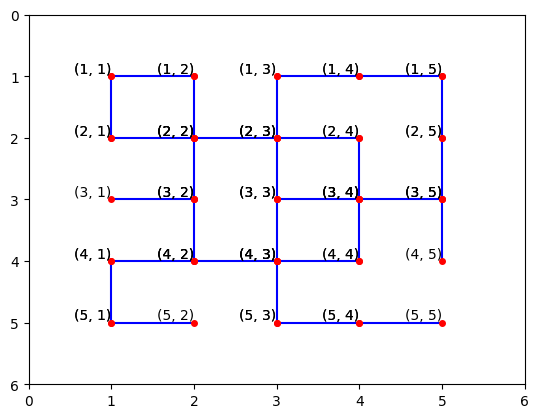

*******************************************************


In [ ]:
from typing import List, Tuple
import matplotlib.pyplot as plt

class SquareCounter:
    def __init__(self, file_name: str) -> None:
        """Function that initializes the counter of squares

        Args:
            file_name (str): Name of the file where the information is to be read from
        """
        self.file_name = file_name
        self.user_edges: List[Tuple[Tuple[int, int], Tuple[int, int]]] = []
        self.graph_edges: List[Tuple[Tuple[int, int], Tuple[int, int]]] = []
        self.n: int = 0
        self.current_exercise = []
        self.exercises = []

    def read_file(self) -> List[str]:
        """Function that reads the file and returns its lines

        Returns:
            List[str]: List of lines of the file
        """
        with open(self.file_name, 'r') as file:
            return file.readlines()

    def process_line(self, line: str) -> str:
        """Function that processes a line of the file

        Args:
            line (str): Line to be processed

        Returns:
            str: Processed line
        """
        return line.strip()

    def get_user_edges(self, lines: List[str]) -> None:
        """Function that gets the user edges from the lines of the file

        Args:
            lines (List[str]): List of lines of the file
        """
        for line in lines[2:]:
            type_ = line[0]
            if type_ == 'H':
                i = int(line[2])
                j = int(line[4])
                self.graph_edges.append(((i, j), (i, j+1)))
                self.user_edges.append(((i-1, j-1), (i-1, j)))
            elif type_ == 'V':
                i = int(line[2])
                j = int(line[4])
                self.graph_edges.append(((i, j), (i+1, j)))
                self.user_edges.append(((i-1, j-1), (i, j-1)))

    def count_squares(self) -> List[int]:
        """Function that counts the number of squares of each size

        Returns:
            List[int]: List of the number of squares of each size
        """
        squares = [0] * self.n
        for square_size in range(1, self.n):
            for i in range(self.n - square_size):
                for j in range(self.n - square_size):
                    edges = []
                    for l in range(1, square_size + 1):
                        top_right = ((i, j + l - 1), (i, j + l))
                        bottom_right = ((i + l - 1, j + square_size), (i + l, j + square_size))
                        bottom_left = ((i + l - 1, j), (i + l, j))
                        top_left = ((i + square_size, j + l - 1), (i + square_size, j + l))
                        edges.extend([top_right, bottom_right, bottom_left, top_left])
                    if all(edge in self.user_edges for edge in edges):
                        squares[square_size - 1] += 1
        return squares

    def print_squares(self, squares: List[int]) -> None:
        """Function that prints the number of squares of each size

        Args:
            squares (List[int]): List of the number of squares of each size
        """
        for size, count in enumerate(squares):
            if count != 0:
                print(f"Squares of size {size + 1}: {count}")
        if all(element == 0 for element in squares):
            print("No square was found")

    def plot_graph(self) -> None:
        """Function that plots the graph of the edges of the squares
        """
        fig, ax = plt.subplots()
        for edge in self.graph_edges:
            x_values = [edge[0][1], edge[1][1]]
            y_values = [edge[0][0], edge[1][0]]
            ax.plot(x_values, y_values, color='blue')
        for edge in self.graph_edges:
            for point in edge:
                ax.plot(point[1], point[0], marker='o', markersize=4, color='red')
        for edge in self.graph_edges:
            for point in edge:
                ax.text(point[1], point[0], f'({point[0]}, {point[1]})', verticalalignment='bottom', horizontalalignment='right')
        ax.set_xlim(0, self.n+1)
        ax.set_ylim(self.n+1, 0)
        plt.show()
        self.user_edges = []
        self.graph_edges = []

    def run(self) -> None:
        """Function that runs the square counter
        """
        lines = self.read_file()

        for line in lines:
            line = line.strip()
            if line.isdigit():
                self.current_exercise.append(line)
            elif self.current_exercise:
                self.current_exercise.append(line)
                if len(self.current_exercise) == int(self.current_exercise[1]) + 2:
                    self.exercises.append(self.current_exercise)
                    self.current_exercise = []

        number_of_exercises = 0
        for exercise in self.exercises:
            number_of_exercises += 1
            print(f"Problem #{number_of_exercises}")
            self.n = int(exercise[0])
            self.get_user_edges(exercise)
            squares = self.count_squares()
            self.print_squares(squares)
            self.plot_graph()
            print('*******************************************************')

if __name__ == "__main__":
    file_name = 'archivo4.txt'
    square_counter = SquareCounter(file_name)
    square_counter.run()

### **Complejidad practica**

##**Comparaciones**

## **Conclusiones**
1.
2.
3.
4.
5.